## Optional Exercise 5: XOR PROBLEM  
  
Following the notebook S3_XOR_template.ipynb:
1) Create a neural net with topology 2 – 2 – 1 to solve the problem.
2) Once converged, plot the boundaries over the scatter plot of the data.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras import layers

### The XOR data


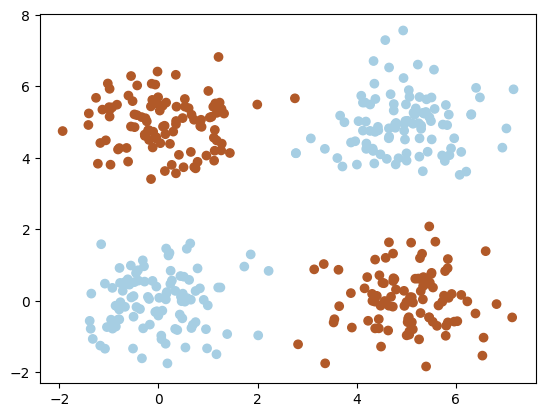

In [2]:
# We create four blobs with different centers to create the original data
centers = ([0, 0], [0, 5], [5, 0], [5, 5])
X, y = datasets.make_blobs(n_samples=400, centers = centers, cluster_std=0.8)
# Reduce the classes to two classe simulating the XOR problem 
y[y == 3] = 0
y[y == 2] = 1
# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

### Neural Network

In [3]:
neural_network = tf.keras.Sequential([
    layers.Input(shape = (2,), name = "Input"),
    layers.Dense(2, activation = "tanh", name = "Hidden_Layer"),
    layers.Dense(1, activation = "sigmoid", name = "Output")]
)

In [4]:
neural_network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer (Dense)            │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
neural_network.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ['accuracy']
)

### Training With Early Stopping

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor = "val_loss",
    patience=15, 
    restore_best_weights = True
)

history = neural_network.fit(
    X, y,
    epochs=500,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3265 - loss: 1.3213 - val_accuracy: 0.4625 - val_loss: 1.0743
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3640 - loss: 1.2497 - val_accuracy: 0.4625 - val_loss: 1.0601
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3516 - loss: 1.2483 - val_accuracy: 0.4625 - val_loss: 1.0456
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3516 - loss: 1.2448 - val_accuracy: 0.4625 - val_loss: 1.0310
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3526 - loss: 1.2464 - val_accuracy: 0.4625 - val_loss: 1.0160
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3629 - loss: 1.1709 - val_accuracy: 0.4625 - val_loss: 1.0011
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3633 - loss: 1.1296 - val_accuracy: 0.4625 - val_loss: 0.9859
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3253 - loss: 1.1929 - val_accuracy: 0.4625 -

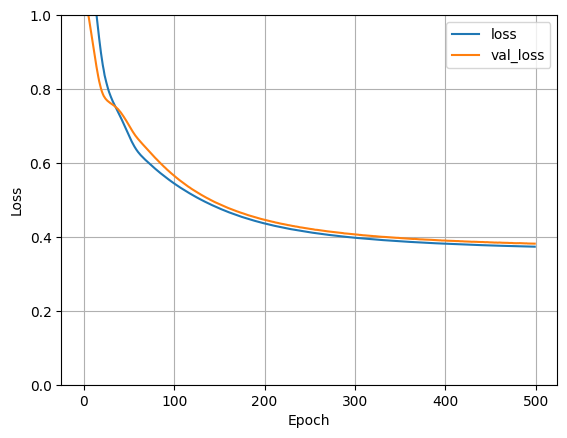

In [7]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
plot_loss(history)

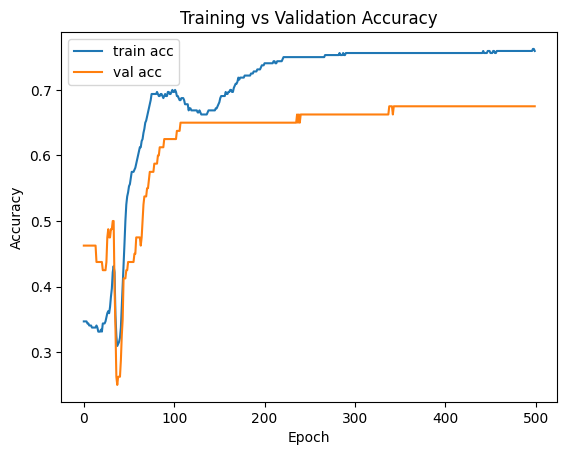

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

### Plotting Boundaries

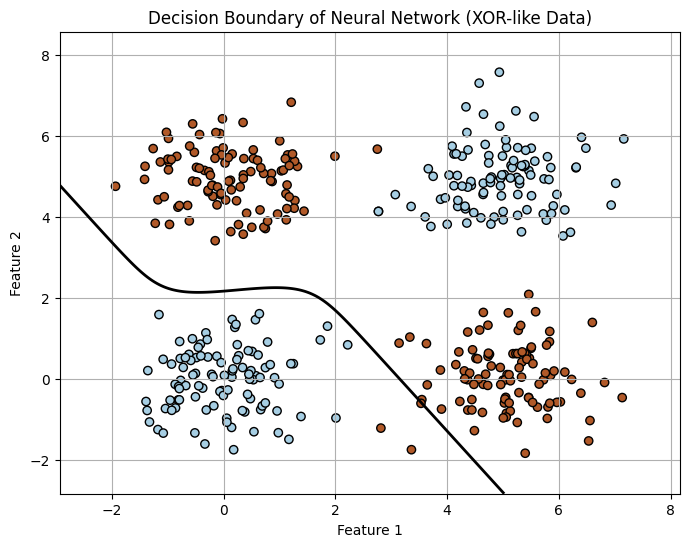

In [13]:
plt.figure(figsize=(8, 6))

# Plot only the decision boundary (black line where prediction = 0.5)
plt.contour(xx, yy, probs, levels=[0.5], colors='black', linewidths=2)

# Plot the original data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

plt.title("Decision Boundary of Neural Network (XOR-like Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

